In [26]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import catboost as cb
from catboost import CatBoostClassifier,Pool
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
pd.set_option('display.max_columns', None)

dtrain=pd.read_csv("C:/Users/ST/Desktop/aidea_leave_job/train.csv")
season=pd.read_csv("C:/Users/ST/Desktop/aidea_leave_job/season.csv")
dtest=pd.read_csv("C:/Users/ST/Desktop/aidea_leave_job/test.csv")
dtrain

,yyyy,PerNo,PerStatus,sex,工作分類,職等,廠區代碼,管理層級,工作資歷1,工作資歷2,工作資歷3,工作資歷4,工作資歷5,專案時數,專案總數,當前專案角色,特殊專案佔比,工作地點,訓練時數A,訓練時數B,訓練時數C,生產總額,榮譽數,是否升遷,升遷速度,近三月請假數A,近一年請假數A,近三月請假數B,近一年請假數B,出差數A,出差數B,出差集中度,年度績效等級A,年度績效等級B,年度績效等級C,年齡層級,婚姻狀況,年資層級A,年資層級B,年資層級C,任職前工作平均年數,最高學歷,畢業學校類別,畢業科系類別,眷屬量,通勤成本,歸屬部門
0,2014,1,0,1.0,1.0,3.0,19.0,4.0,0.0,1.0,1.0,0.0,0.0,23.0,1.0,1.0,3.0,6.0,0.0,0.0,5.0,7.0,1.0,1.0,1.0,3.0,5.0,0.0,0.0,5.0,0.0,9.0,2.0,10.0,4.0,6.0,1.0,2.0,1.0,1.0,2.0,NaN,NaN,5.0,0.0,8.0,19138.0
1,2015,1,0,1.0,1.0,3.0,19.0,6.0,0.0,1.0,1.0,0.0,0.0,23.0,2.0,1.0,1.0,6.0,0.0,0.0,8.0,9.0,2.0,0.0,1.0,4.0,6.0,0.0,0.0,3.0,1.0,4.0,2.0,1.0,5.0,7.0,1.0,2.0,2.0,1.0,2.0,NaN,NaN,5.0,2.0,8.0,19138.0
2,2016,1,0,1.0,1.0,3.0,19.0,6.0,0.0,1.0,1.0,0.0,0.0,23.0,3.0,5.0,1.0,6.0,2.0,0.0,5.0,10.0,2.0,0.0,1.0,4.0,7.0,0.0,0.0,2.0,1.0,2.0,2.0,1.0,2.0,7.0,1.0,2.0,2.0,1.0,2.0,NaN,NaN,5.0,2.0,8.0,19138.0
3,2017,1,0,1.0,1.0,3.0,19.0,6.0,0.0,1.0,1.0,0.0,0.0,23.0,4.0,5.0,5.0,6.0,0.0,0.0,10.0,8.0,2.0,0.0,2.0,5.0,5.0,0.0,0.0,2.0,1.0,1.0,2.0,8.0,5.0,7.0,1.0,2.0,2.0,1.0,2.0,NaN,NaN,5.0,2.0,8.0,19138.0
4,2014,3,0,0.0,1.0,4.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,4.0,5.0,1.0,6.0,0.0,0.0,1.0,8.0,0.0,0.0,6.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,6.0,4.0,2.0,9.0,1.0,5.0,5.0,0.0,0.0,2.0,4.0,1.0,2.0,8.0,8181.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14387,2014,8774,0,1.0,1.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,1.0,5.0,0.0,5.0,0.0,0.0,1.0,2.0,1.0,0.0,5.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,10.0,1.0,6.0,5.0,2.0,1.0,3.0,3.0,8.0,2.0,8.0,8012.0
14388,2015,8774,0,1.0,1.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,22.0,1.0,5.0,0.0,5.0,0.0,0.0,0.0,2.0,1.0,0.0,5.0,2.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,10.0,1.0,6.0,5.0,2.0,1.0,3.0,3.0,8.0,2.0,8.0,8012.0
14389,2016,8774,0,1.0,1.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,1.0,5.0,0.0,5.0,0.0,0.0,1.0,1.0,1.0,0.0,5.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,11.0,1.0,7.0,6.0,2.0,1.0,3.0,3.0,8.0,2.0,8.0,8012.0
14390,2017,8774,0,1.0,1.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,1.0,5.0,1.0,5.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0,2.0,5.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,11.0,1.0,7.0,6.0,2.0,1.0,3.0,3.0,8.0,2.0,8.0,8012.0


In [27]:
dtrain.rename(columns={'yyyy':'年份','PerNo':'個人編號','PerStatus':'離職與否','sex':'性別'}, inplace=True)
dtest.rename(columns={'yyyy':'年份','PerNo':'個人編號','PerStatus':'離職與否','sex':'性別'}, inplace=True)

dtrain

,年份,個人編號,離職與否,性別,工作分類,職等,廠區代碼,管理層級,工作資歷1,工作資歷2,工作資歷3,工作資歷4,工作資歷5,專案時數,專案總數,當前專案角色,特殊專案佔比,工作地點,訓練時數A,訓練時數B,訓練時數C,生產總額,榮譽數,是否升遷,升遷速度,近三月請假數A,近一年請假數A,近三月請假數B,近一年請假數B,出差數A,出差數B,出差集中度,年度績效等級A,年度績效等級B,年度績效等級C,年齡層級,婚姻狀況,年資層級A,年資層級B,年資層級C,任職前工作平均年數,最高學歷,畢業學校類別,畢業科系類別,眷屬量,通勤成本,歸屬部門
0,2014,1,0,1.0,1.0,3.0,19.0,4.0,0.0,1.0,1.0,0.0,0.0,23.0,1.0,1.0,3.0,6.0,0.0,0.0,5.0,7.0,1.0,1.0,1.0,3.0,5.0,0.0,0.0,5.0,0.0,9.0,2.0,10.0,4.0,6.0,1.0,2.0,1.0,1.0,2.0,NaN,NaN,5.0,0.0,8.0,19138.0
1,2015,1,0,1.0,1.0,3.0,19.0,6.0,0.0,1.0,1.0,0.0,0.0,23.0,2.0,1.0,1.0,6.0,0.0,0.0,8.0,9.0,2.0,0.0,1.0,4.0,6.0,0.0,0.0,3.0,1.0,4.0,2.0,1.0,5.0,7.0,1.0,2.0,2.0,1.0,2.0,NaN,NaN,5.0,2.0,8.0,19138.0
2,2016,1,0,1.0,1.0,3.0,19.0,6.0,0.0,1.0,1.0,0.0,0.0,23.0,3.0,5.0,1.0,6.0,2.0,0.0,5.0,10.0,2.0,0.0,1.0,4.0,7.0,0.0,0.0,2.0,1.0,2.0,2.0,1.0,2.0,7.0,1.0,2.0,2.0,1.0,2.0,NaN,NaN,5.0,2.0,8.0,19138.0
3,2017,1,0,1.0,1.0,3.0,19.0,6.0,0.0,1.0,1.0,0.0,0.0,23.0,4.0,5.0,5.0,6.0,0.0,0.0,10.0,8.0,2.0,0.0,2.0,5.0,5.0,0.0,0.0,2.0,1.0,1.0,2.0,8.0,5.0,7.0,1.0,2.0,2.0,1.0,2.0,NaN,NaN,5.0,2.0,8.0,19138.0
4,2014,3,0,0.0,1.0,4.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,4.0,5.0,1.0,6.0,0.0,0.0,1.0,8.0,0.0,0.0,6.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,6.0,4.0,2.0,9.0,1.0,5.0,5.0,0.0,0.0,2.0,4.0,1.0,2.0,8.0,8181.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14387,2014,8774,0,1.0,1.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,1.0,5.0,0.0,5.0,0.0,0.0,1.0,2.0,1.0,0.0,5.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,10.0,1.0,6.0,5.0,2.0,1.0,3.0,3.0,8.0,2.0,8.0,8012.0
14388,2015,8774,0,1.0,1.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,22.0,1.0,5.0,0.0,5.0,0.0,0.0,0.0,2.0,1.0,0.0,5.0,2.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,10.0,1.0,6.0,5.0,2.0,1.0,3.0,3.0,8.0,2.0,8.0,8012.0
14389,2016,8774,0,1.0,1.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,1.0,5.0,0.0,5.0,0.0,0.0,1.0,1.0,1.0,0.0,5.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,11.0,1.0,7.0,6.0,2.0,1.0,3.0,3.0,8.0,2.0,8.0,8012.0
14390,2017,8774,0,1.0,1.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,1.0,5.0,1.0,5.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0,2.0,5.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,11.0,1.0,7.0,6.0,2.0,1.0,3.0,3.0,8.0,2.0,8.0,8012.0


In [37]:
# categorical=[c for c in dtrain.columns if c not in ['個人編號','年份','離職與否']]
dtrain.fillna(999,inplace=True)

dtrain=dtrain.astype(float).astype(int)
dtrain['總工作資歷']=dtrain['工作資歷1']+dtrain['工作資歷2']+dtrain['工作資歷3']+dtrain['工作資歷4']+dtrain['工作資歷5']
dtrain['總訓練時數']=dtrain['訓練時數A']+dtrain['訓練時數B']+dtrain['訓練時數C']
dtrain['近三月請假總數']=dtrain['近三月請假數A']+dtrain['近三月請假數B']
dtrain['近一年請假總數']=dtrain['近一年請假數A']+dtrain['近一年請假數B']
dtrain['出差總數']=dtrain['出差數A']+dtrain['出差數B']
dtrain['年度績效等級ABC']=dtrain['年度績效等級A']+dtrain['年度績效等級B']+dtrain['年度績效等級C']
dtrain['年資層級ABC']=dtrain['年資層級A']+dtrain['年資層級B']+dtrain['年資層級C']

# dtrain=dtrain.astype(float).astype(int).astype(str)
dtrain=dtrain.astype(str)

cols=[c for c in dtrain.columns if c not in '離職與否']
X_train, X_valid, y_train, y_valid = train_test_split(dtrain[cols], dtrain['離職與否'], test_size=0.3,
                                                      stratify=dtrain['離職與否'], random_state=777)


In [32]:
# pool
cat_features=[c for c in dtrain.columns if c not in ['年份','離職與否']]
# dtrain_pool=Pool(data=dtrain,label=dtrain['離職與否'],cat_features=cat_features)
# train
train_pool = Pool(X_train, y_train, cat_features=cat_features)
# validation
validate_pool = Pool(X_valid, y_valid, cat_features=cat_features)


In [38]:
cat = CatBoostClassifier(
                           learning_rate=0.1,
                           n_estimators=500,
                           eval_metric='AUC',
                           
)
cat.fit(X_train, y_train,  eval_set=[(X_valid, y_valid)],cat_features=cols,verbose=True,use_best_model=True)
# cat.fit(train_pool,  eval_set=validate_pool,cat_features=cat_features,verbose=True,use_best_model=True)


0:	test: 0.6234243	best: 0.6234243 (0)	total: 171ms	remaining: 1m 25s
1:	test: 0.6234243	best: 0.6234243 (0)	total: 200ms	remaining: 49.9s
2:	test: 0.6234243	best: 0.6234243 (0)	total: 231ms	remaining: 38.3s
3:	test: 0.6234243	best: 0.6234243 (0)	total: 237ms	remaining: 29.4s
4:	test: 0.6234243	best: 0.6234243 (0)	total: 243ms	remaining: 24s
5:	test: 0.6531925	best: 0.6531925 (5)	total: 359ms	remaining: 29.6s
6:	test: 0.6531925	best: 0.6531925 (5)	total: 418ms	remaining: 29.5s
7:	test: 0.6531433	best: 0.6531925 (5)	total: 473ms	remaining: 29.1s
8:	test: 0.6531433	best: 0.6531925 (5)	total: 481ms	remaining: 26.2s
9:	test: 0.6531433	best: 0.6531925 (5)	total: 486ms	remaining: 23.8s
10:	test: 0.6725667	best: 0.6725667 (10)	total: 638ms	remaining: 28.4s
11:	test: 0.7963695	best: 0.7963695 (11)	total: 823ms	remaining: 33.5s
12:	test: 0.8232436	best: 0.8232436 (12)	total: 1.06s	remaining: 39.8s
13:	test: 0.8234164	best: 0.8234164 (13)	total: 1.26s	remaining: 43.8s
14:	test: 0.8260921	best: 0

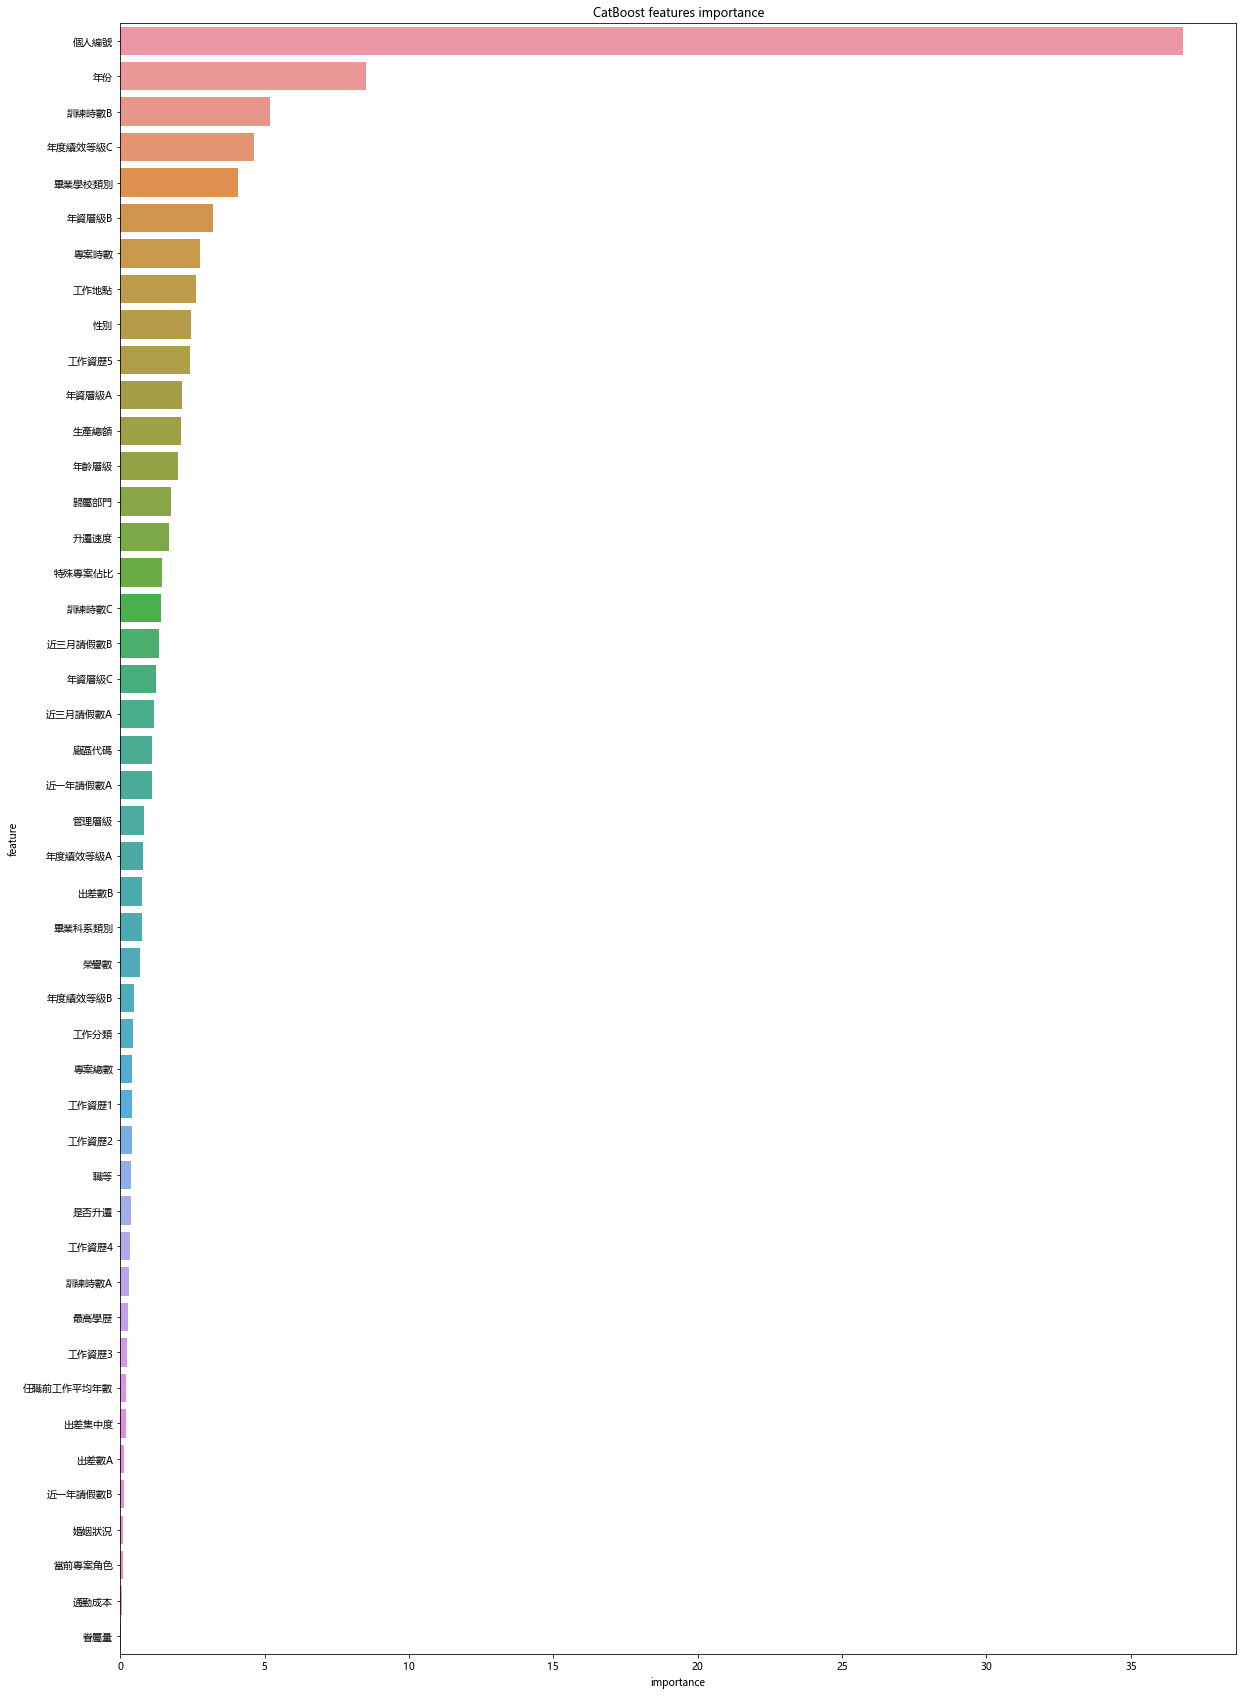

In [14]:

def feature_importances(df, model):
    max_num_features=100
    feature_importances = pd.DataFrame(columns = ['feature', 'importance'])
    feature_importances['feature'] = df.columns
    feature_importances['importance'] = model.feature_importances_
    feature_importances.sort_values(by='importance', ascending=False, inplace=True)
    feature_importances = feature_importances[:max_num_features]
    plt.figure(figsize=(20, 30));
    sns.barplot(x="importance", y="feature", data=feature_importances);
    plt.title('CatBoost features importance');
    
feature_importances(X_train, cat)

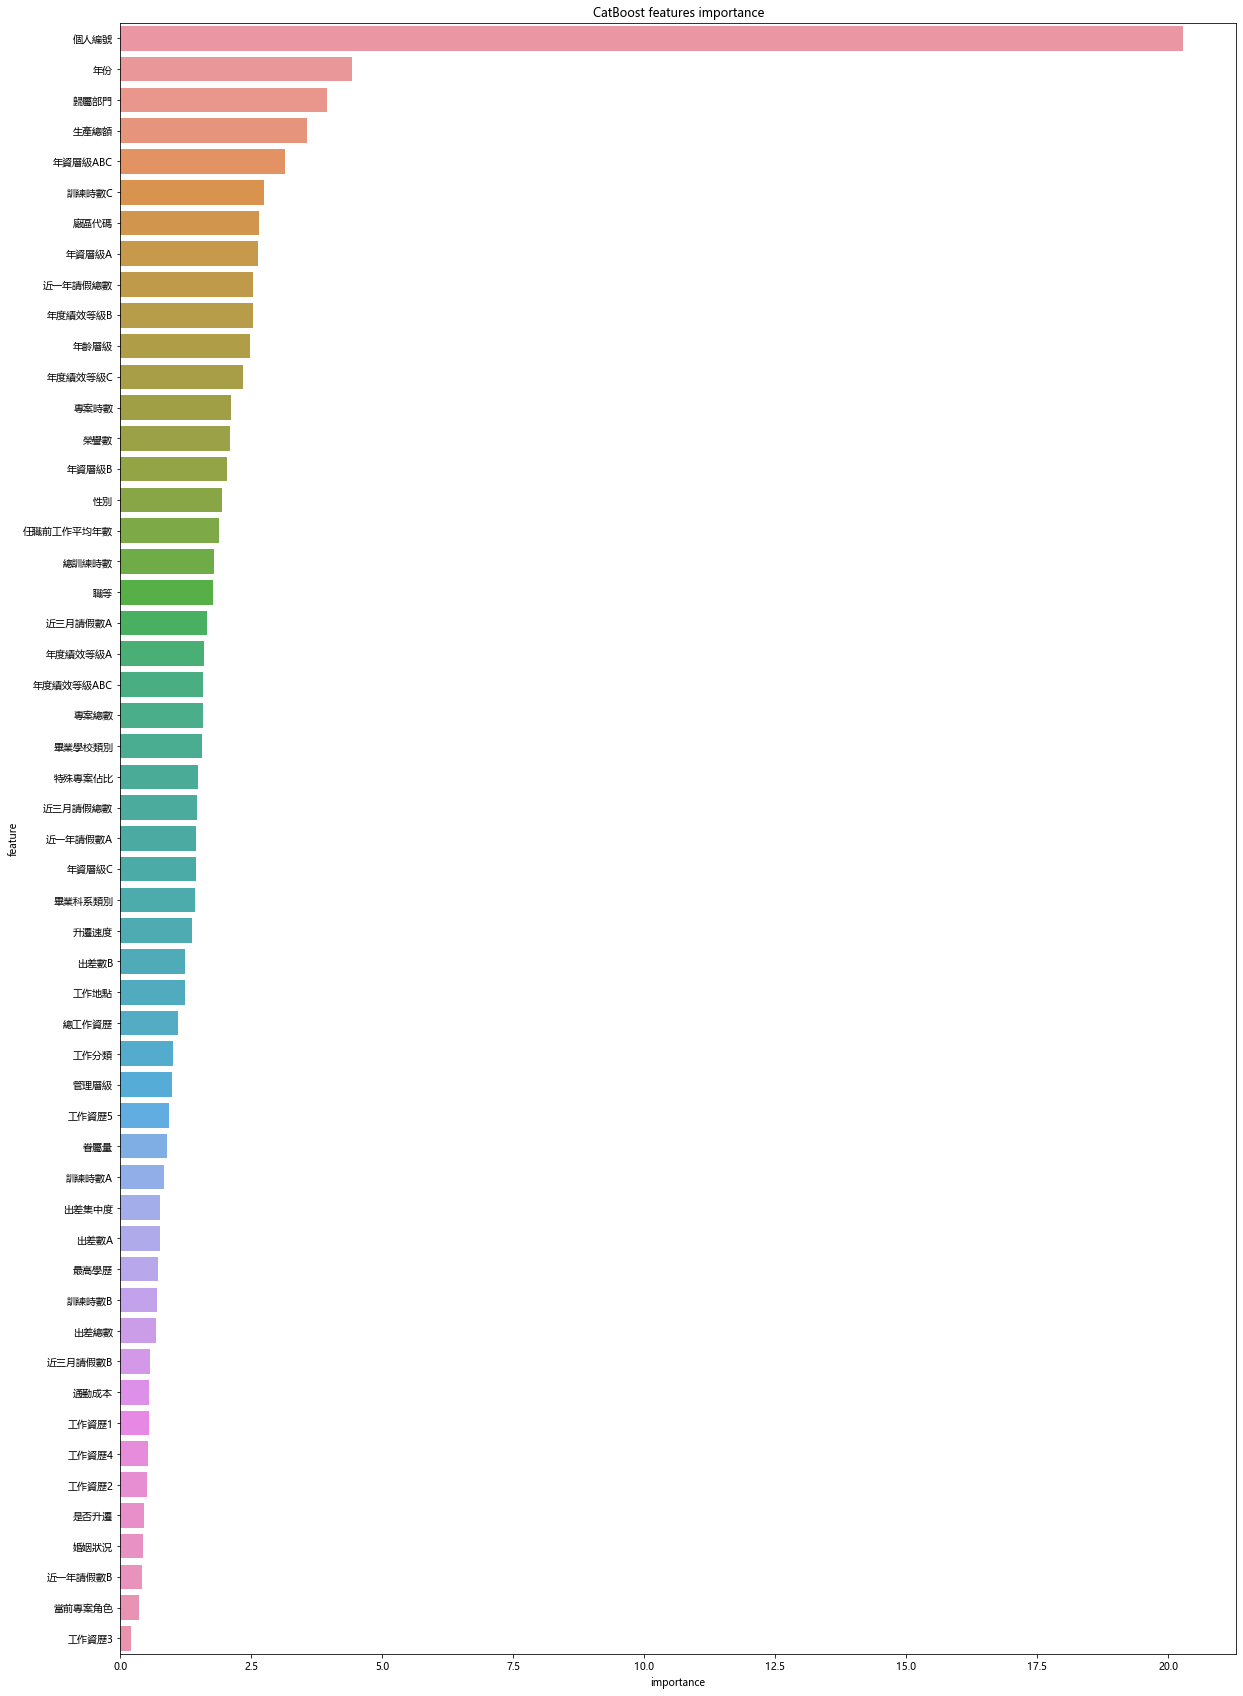

In [39]:
import seaborn as sns
def feature_importances(df, model):
    max_num_features=100
    feature_importances = pd.DataFrame(columns = ['feature', 'importance'])
    feature_importances['feature'] = df.columns
    feature_importances['importance'] = model.feature_importances_
    feature_importances.sort_values(by='importance', ascending=False, inplace=True)
    feature_importances = feature_importances[:max_num_features]
    plt.figure(figsize=(20, 30));
    sns.barplot(x="importance", y="feature", data=feature_importances);
    plt.title('CatBoost features importance');
    
feature_importances(X_train, cat)

In [16]:
leave_df = dtrain.loc[dtrain['離職與否']=='1']
leave_df

,年份,個人編號,離職與否,性別,工作分類,職等,廠區代碼,管理層級,工作資歷1,工作資歷2,工作資歷3,工作資歷4,工作資歷5,專案時數,專案總數,當前專案角色,特殊專案佔比,工作地點,訓練時數A,訓練時數B,訓練時數C,生產總額,榮譽數,是否升遷,升遷速度,近三月請假數A,近一年請假數A,近三月請假數B,近一年請假數B,出差數A,出差數B,出差集中度,年度績效等級A,年度績效等級B,年度績效等級C,年齡層級,婚姻狀況,年資層級A,年資層級B,年資層級C,任職前工作平均年數,最高學歷,畢業學校類別,畢業科系類別,眷屬量,通勤成本,歸屬部門
17,2017,11,1,1,1,7,20,1,0,0,0,0,1,22,2,5,0,6,3,0,1,3,0,0,2,4,7,0,0,1,0,0,5,5,2,3,2,1,1,0,0,2,4,5,0,8,20208
20,2016,14,1,1,1,7,4,1,0,0,0,0,1,23,2,5,1,6,0,1,0,10,0,0,2,2,8,0,0,1,1,0,5,1,4,3,2,1,1,0,0,2,4,5,0,8,4045
48,2014,28,1,1,1,4,6,1,0,0,0,0,0,23,1,5,0,6,0,0,1,5,0,0,1,0,7,1,2,1,0,0,1,4,2,4,2,2,1,2,0,2,1,5,0,8,6167
76,2014,54,1,1,1,4,8,1,0,0,0,0,1,23,1,1,0,5,0,0,1,3,0,0,1,3,7,0,0,1,0,0,10,10,2,5,1,1,1,0,0,999,4,8,1,8,8145
154,2014,105,1,1,1,3,19,1,0,0,1,0,1,22,1,1,0,6,0,2,1,8,1,0,1,4,7,0,0,1,1,3,1,10,4,5,2,2,2,0,0,2,3,5,1,13,19043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14285,2014,8714,1,1,1,3,13,6,0,0,0,0,1,23,3,1,4,6,0,0,4,10,1,0,1,4,6,0,0,1,1,0,1,1,5,5,1,2,2,0,0,2,4,6,1,8,13049
14294,2015,8718,1,1,1,2,20,2,0,1,0,0,1,23,3,1,0,6,0,0,2,5,0,0,2,6,6,0,0,3,1,2,4,1,4,6,1,3,3,0,0,2,4,5,0,8,20089
14371,2016,8757,1,1,1,3,13,4,0,0,0,1,1,23,2,5,0,6,0,0,0,4,4,0,2,3,7,0,0,3,1,3,7,1,4,6,1,3,3,0,0,2,4,3,2,8,13159
14374,2017,8758,1,1,1,4,13,4,0,0,0,0,0,23,1,5,0,6,1,0,2,9,1,0,2,2,7,0,0,3,0,5,2,8,5,8,1,2,2,1,1,999,4,7,2,8,13159


In [ ]:
# 訓練時數
dtrain['個人編號']


In [ ]:
# confusion matrix


In [ ]:
# unique values


In [ ]:
# 歸屬部門離職率


In [ ]:
# 生產總額圖


In [ ]:
# 近一年請假數A


In [ ]:
# 年資層級A


In [37]:
train_no=dtrain['個人編號'].tolist()
test_no=dtest['個人編號'].tolist()

accordance_ratio=len(set(train_no) & set(test_no))/len(test_no)
# Do not drop perNo
print(accordance_ratio)

0.9023803155924044
